In [1]:
# Importing the required libraries.

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the IMDB dataset from tensorflow-datasets.

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTHULRN/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTHULRN/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTHULRN/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Forming the training and testing datasets.

print(type(train_data))

train_sentences, train_labels = [], []
test_sentences, test_labels = [], []
for sentence,label in train_data:
    train_sentences.append(sentence.numpy().decode('utf8'))
    train_labels.append(label.numpy())
for sentence,label in test_data:
    test_sentences.append(sentence.numpy().decode('utf8'))
    test_labels.append(label.numpy())

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>


Number of sentences in training set:  25000
Number of sentences in testing set: 25000
Number of positive and negative reviews in training set: [12500 12500]
Number of positive and negative reviews in testing set: [12500 12500]

Unique words in training datasets: 88583 

Minimum length of sentence in training set: 52
Maximum length of sentence in training set: 13704
Minimum length of sentence in testing set: 32
Maximum length of sentence in testing set: 12988



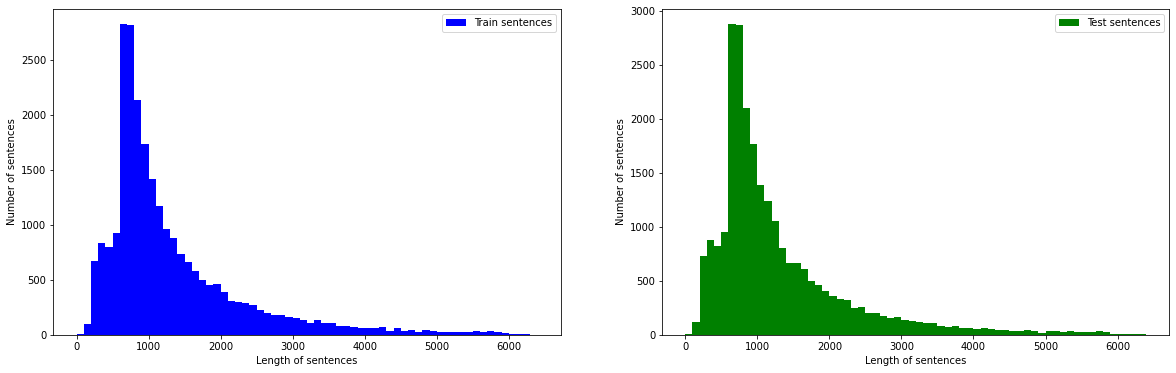

In [4]:
# Exploratory Data Analysis - EDA.

print('Number of sentences in training set: ',len(train_sentences))
print('Number of sentences in testing set:', len(test_sentences))
print('Number of positive and negative reviews in training set:', np.unique(train_labels, return_counts=True)[1])
print('Number of positive and negative reviews in testing set:', np.unique(test_labels, return_counts=True)[1])
print()

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
print('Unique words in training datasets:', len(tokenizer.word_index), '\n')

train_sentences_length, test_sentences_length = [], []
for sentence in train_sentences:
    train_sentences_length.append(len(sentence))
for sentence in test_sentences:
    test_sentences_length.append(len(sentence))

print('Minimum length of sentence in training set:', min(train_sentences_length))
print('Maximum length of sentence in training set:', max(train_sentences_length))
print('Minimum length of sentence in testing set:', min(test_sentences_length))
print('Maximum length of sentence in testing set:', max(test_sentences_length))
print()

plt.figure(figsize=(20,6))
bins = [100*i for i in range(65)]

plt.subplot(1,2,1)
plt.hist(train_sentences_length, bins=bins, color='b', label='Train sentences')
plt.xlabel('Length of sentences')
plt.ylabel('Number of sentences')
plt.legend()

plt.subplot(1,2,2)
plt.hist(test_sentences_length, bins=bins, color='g', label='Test sentences')
plt.xlabel('Length of sentences')
plt.ylabel('Number of sentences')
plt.legend()

plt.show()

In [23]:
# Setting the parameters for our model.

vocab_size = 32000
embedding_dim = 32
maxlen = 3000
truncating = 'post'
padding = 'pre'
epochs = 5

In [24]:
# Tokenizing the training and testing sentences.

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=maxlen, truncating=truncating, padding=padding)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=maxlen, truncating=truncating, padding=padding)

In [25]:
# Building a NN model with Embedding layer.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_padded, train_labels, epochs=epochs, validation_data=(test_padded, test_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 3000, 32)          1024000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 96000)             0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 96000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              98305024  
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)              